In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 이미지 불러오기
ori_image = cv2.imread('C:/data/img_Seg.jpg')

In [5]:
ori_image

array([[[ 30,  45,  48],
        [ 25,  40,  43],
        [ 38,  50,  54],
        ...,
        [ 30,  41,  38],
        [ 14,  25,  22],
        [ 23,  34,  32]],

       [[ 22,  34,  38],
        [ 43,  55,  59],
        [ 39,  51,  55],
        ...,
        [181, 190, 187],
        [144, 155, 152],
        [123, 132, 129]],

       [[ 48,  60,  62],
        [ 22,  34,  36],
        [ 80,  92,  94],
        ...,
        [244, 251, 246],
        [234, 244, 238],
        [249, 255, 253]],

       ...,

       [[ 63,  69,  64],
        [ 64,  70,  65],
        [ 64,  70,  65],
        ...,
        [ 83,  90,  77],
        [ 83,  90,  77],
        [ 81,  88,  75]],

       [[ 66,  73,  68],
        [ 66,  73,  68],
        [ 56,  63,  58],
        ...,
        [ 83,  90,  77],
        [ 83,  90,  77],
        [ 81,  88,  75]],

       [[ 68,  77,  74],
        [ 41,  50,  47],
        [ 34,  43,  40],
        ...,
        [ 81,  88,  75],
        [ 81,  88,  75],
        [ 82,  88,  77]]

In [6]:
# OpenCV => BGR
# matplotlib => RGB

image = cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB)

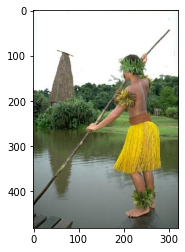

In [7]:
# 이미지를 한 번 구경해보자
plt.imshow(image)

In [13]:
image

array([[[ 48,  45,  30],
        [ 43,  40,  25],
        [ 54,  50,  38],
        ...,
        [ 38,  41,  30],
        [ 22,  25,  14],
        [ 32,  34,  23]],

       [[ 38,  34,  22],
        [ 59,  55,  43],
        [ 55,  51,  39],
        ...,
        [187, 190, 181],
        [152, 155, 144],
        [129, 132, 123]],

       [[ 62,  60,  48],
        [ 36,  34,  22],
        [ 94,  92,  80],
        ...,
        [246, 251, 244],
        [238, 244, 234],
        [253, 255, 249]],

       ...,

       [[ 64,  69,  63],
        [ 65,  70,  64],
        [ 65,  70,  64],
        ...,
        [ 77,  90,  83],
        [ 77,  90,  83],
        [ 75,  88,  81]],

       [[ 68,  73,  66],
        [ 68,  73,  66],
        [ 58,  63,  56],
        ...,
        [ 77,  90,  83],
        [ 77,  90,  83],
        [ 75,  88,  81]],

       [[ 74,  77,  68],
        [ 47,  50,  41],
        [ 40,  43,  34],
        ...,
        [ 75,  88,  81],
        [ 75,  88,  81],
        [ 77,  88,  82]]

In [8]:
image.shape

(481, 321, 3)

- 세로 481, 가로가 321, 3개의 chaanel(R,G,B)로 이루어진 사진임을 알 수 있음

데이터는 어떤 형식으로?

- samples : It should be of np.float32 data type, and each feature should be put in a single column.

- cv2.k-means 를 실행하기 위해 형식과 shape 를 바꾸어준다

- 불러온 이미지를 3-dimension 을 가지는 vector 로 만들기 위해 reshape 을 써준다
- 3-dimension 은 각각 R, G, B 를 나타내는 것으로써 픽셀값을 3개의 색깔 (3차원) 로 이루어진 벡터로 만들기 위함이다

In [14]:
vertorized = image.reshape(-1,3) # 1열로 나열
vertorized = np.float32(vertorized)

In [15]:
print('vertorized image의 shape', vertorized.shape)
vertorized

vertorized image의 shape (154401, 3)


array([[48., 45., 30.],
       [43., 40., 25.],
       [54., 50., 38.],
       ...,
       [75., 88., 81.],
       [75., 88., 81.],
       [77., 88., 82.]], dtype=float32)

Criteria 설정

k-means clustering을 수행시 알고리즘이 멈추게 되는 상황을 정해줌
멈추게 되는 기준(criteria)는 3개의 매개변수로 이루어져 있음
1. criterion type:
    cv.TERM_CRITERIA_EPS -> Requirement epsilon을 충족하면 알고리즘 중지
    cv.TERM_CRITERIA_MAX_ITER -> iteration을 채우면 알고리즘 중지
    cv.TERM_CRITERIA_EPS + cv.TERM_CRITERA_MAX_ITER -> 위의 조건 중 하나라도 충족되면 알고리즘 중지 -> 보통 이걸 사용
2. max_iter: 지정된 반복 횟수 max_iter -> criteria을 새로 지정해줄 때마다 iter 증가
3. epsilon: Requirement accuracy

In [16]:
# 기준점 설정: 100번 iteration, 1.0 epsilon 둘 중 하나를 만족할 시 알고리즘을 끝냄
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)

k-means 설정

k-means clustering을 실제로 수행

k-means 내의 parameter들은 다음과 같이 이루어져 있다

1. sample: 실제 data
2. ncluster(K): cluster 갯수
3. criteria: 종료 기준
4. attempts: kmeans 알고리즘의 시도 횟수
5. flags: centriod init method

In [20]:
# cluster k 정하기
k =4

# k-means clustering 실행
_, labels, centroid = cv2.kmeans(vertorized,k,None,criteria,10,cv2.KMEANS_PP_CENTERS)


In [21]:
labels

array([[3],
       [3],
       [3],
       ...,
       [3],
       [3],
       [3]], dtype=int32)

[Output Parameters]

1. compactness: It is the sum of squared distance from each point to their corresponding centers
2. labels: This is the label array(same as 'code' in previous article) where each element marked '0', '1', ...
3. centers: This is array of centers of clusters

In [22]:
print(len(labels))

154401


In [23]:
labels.flatten()

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

In [24]:
with np.printoptions(threshold=np.inf):
    print(labels.flatten())

[3 3 3 3 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 1 1 1
 3 1 1 1 1 1 1 1 1 3 1 1 1 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [25]:
# k가 4개이므로 총 4개의 label이 생겼음을 알 수 있다.
np.unique(labels)

array([0, 1, 2, 3], dtype=int32)

In [26]:
# cluster들의 색깔 또한 다음과 같이 정해져 있음
print(centroid)

[[253.1163   253.66835  252.65869 ]
 [130.59999  134.68716  120.43533 ]
 [206.87569  173.21404   28.07314 ]
 [ 69.95894   80.6717    50.267967]]


In [27]:
print("0번 cluster의 색깔", centroid[0])
print("1번 cluster의 색깔", centroid[1])
print("2번 cluster의 색깔", centroid[2])
print("3번 cluster의 색깔", centroid[3])

0번 cluster의 색깔 [253.1163  253.66835 252.65869]
1번 cluster의 색깔 [130.59999 134.68716 120.43533]
2번 cluster의 색깔 [206.87569 173.21404  28.07314]
3번 cluster의 색깔 [69.95894  80.6717   50.267967]


실제 image 그려보기

In [29]:
# 다시 이미지로 되돌리기 위해 type을 바꿔준다
unit8_centers = np.uint8(centroid)

# flatten the labels array
labels = labels.flatten()

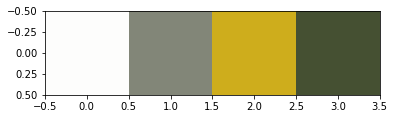

In [30]:
# 0 => 어두운 색, 255 => 밝은색
plt.imshow(unit8_centers.reshape(-1,4,3)) #4개의 군집 + 3개의 채널

In [31]:
segmented_image = unit8_centers[labels]
segmented_image # 인덱스에 맞는 색깔 출력

array([[69, 80, 50],
       [69, 80, 50],
       [69, 80, 50],
       ...,
       [69, 80, 50],
       [69, 80, 50],
       [69, 80, 50]], dtype=uint8)

잘 이해가 되지 않을 수 있는데, a = np.array([1,1,1,2,3,1,0])를 입력한 후 unit8_centers[a]를 출력

In [32]:
a = np.array([1,1,1,2,3,1,0])
unit8_centers[a]

array([[130, 134, 120],
       [130, 134, 120],
       [130, 134, 120],
       [206, 173,  28],
       [ 69,  80,  50],
       [130, 134, 120],
       [253, 253, 252]], dtype=uint8)

즉, 클러스터링 이후에 구해준 centroid(RGB) 값으로 이미지의 색깔을 변경

[253, 253, 252], <br>
[130, 134, 120], <br>
[206, 173, 28]. <br>
[69, 80, 50] <br>
이 해당되는 label에 indexㅔ 맞게 할당되는 것

In [33]:
# 이미지를 출력하기 위해 matrix를 원래의 image의 shape로 reshape 시켜준다
restored_image = segmented_image.reshape(image.shape)
restored_image

array([[[ 69,  80,  50],
        [ 69,  80,  50],
        [ 69,  80,  50],
        ...,
        [ 69,  80,  50],
        [ 69,  80,  50],
        [ 69,  80,  50]],

       [[ 69,  80,  50],
        [ 69,  80,  50],
        [ 69,  80,  50],
        ...,
        [130, 134, 120],
        [130, 134, 120],
        [130, 134, 120]],

       [[ 69,  80,  50],
        [ 69,  80,  50],
        [ 69,  80,  50],
        ...,
        [253, 253, 252],
        [253, 253, 252],
        [253, 253, 252]],

       ...,

       [[ 69,  80,  50],
        [ 69,  80,  50],
        [ 69,  80,  50],
        ...,
        [ 69,  80,  50],
        [ 69,  80,  50],
        [ 69,  80,  50]],

       [[ 69,  80,  50],
        [ 69,  80,  50],
        [ 69,  80,  50],
        ...,
        [ 69,  80,  50],
        [ 69,  80,  50],
        [ 69,  80,  50]],

       [[ 69,  80,  50],
        [ 69,  80,  50],
        [ 69,  80,  50],
        ...,
        [ 69,  80,  50],
        [ 69,  80,  50],
        [ 69,  80,  50]]

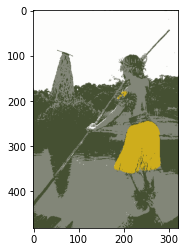

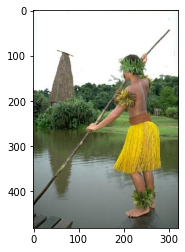

In [35]:
# 이미지 출력
plt.imshow(restored_image)
plt.show()

plt.imshow(image)
plt.show()